In [ ]:
%% Machine Learning Online Class
%  Exercise 1: Linear regression with multiple variables
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear regression exercise. 
%
%  You will need to complete the following functions in this 
%  exericse:
%
%     warmUpExercise.m
%     plotData.m
%     gradientDescent.m
%     computeCost.m
%     gradientDescentMulti.m
%     computeCostMulti.m
%     featureNormalize.m
%     normalEqn.mc
%
%  For this part of the exercise, you will need to change some
%  parts of the code below for various experiments (e.g., changing
%  learning rates).
%

%% Initialization

### featureNormalize function, used in Part I

In [48]:
function [X_norm, mu, sigma] = featureNormalize(X)
%FEATURENORMALIZE Normalizes the features in X 
%   FEATURENORMALIZE(X) returns a normalized version of X where
%   the mean value of each feature is 0 and the standard deviation
%   is 1. This is often a good preprocessing step to do when
%   working with learning algorithms.

    % You need to set these values correctly
    X_norm = X;
    mu = zeros(1, size(X, 2));
    sigma = zeros(1, size(X, 2));

    % ====================== YOUR CODE HERE ======================
    % Instructions: First, for each feature dimension, compute the mean
    %               of the feature and subtract it from the dataset,
    %               storing the mean value in mu. Next, compute the 
    %               standard deviation of each feature and divide
    %               each feature by it's standard deviation, storing
    %               the standard deviation in sigma. 
    %
    %               Note that X is a matrix where each column is a 
    %               feature and each row is an example. You need 
    %               to perform the normalization separately for 
    %               each feature. 
    %
    % Hint: You might find the 'mean' and 'std' functions useful.
    %       

    mu = mean(X);
    sigma = std(X);
    X_norm = (X - mu)./sigma;
end

### computeCostMulti, used in gradientDescentMulti

In [49]:
function J = computeCostMulti(X, y, theta)
%COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
%   J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y

    % Initialize some useful values
    m = length(y); % number of training examples

    % You need to return the following variables correctly 
    J = 0;

    % ====================== YOUR CODE HERE ======================
    % Instructions: Compute the cost of a particular choice of theta
    %               You should set J to the cost.

    J = 1/(2 * m) * sum((X*theta - y).^2);



    % =========================================================================

end


### gradientDescentMulti, used in Part 2

In [50]:
function [theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)
%GRADIENTDESCENTMULTI Performs gradient descent to learn theta
%   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
%   taking num_iters gradient steps with learning rate alpha

    % Initialize some useful values
    m = length(y); % number of training examples
    J_history = zeros(num_iters, 1);

    for iter = 1:num_iters

        % ====================== YOUR CODE HERE ======================
        % Instructions: Perform a single gradient step on the parameter vector
        %               theta. 
        %
        % Hint: While debugging, it can be useful to print out the values
        %       of the cost function (computeCostMulti) and gradient here.
        %


    theta_temp = theta;
    theta = theta_temp - alpha/m * (X'*(X*theta_temp - y));

    % 3x1       3x1                 3x47 47x3 * 3x1  47x1      





        % ============================================================

        % Save the cost J in every iteration    
        J_history(iter) = computeCostMulti(X, y, theta);

    end

end


### normalEqn, used in part 3

In [51]:
function [theta] = normalEqn(X, y)
%NORMALEQN Computes the closed-form solution to linear regression 
%   NORMALEQN(X,y) computes the closed-form solution to linear 
%   regression using the normal equations.

theta = zeros(size(X, 2), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the code to compute the closed form solution
%               to linear regression and put the result in theta.
%

% ---------------------- Sample Solution ----------------------

theta = pinv(X' * X) * X' * y;

#         3x97  97x3  3x97 97x1

% -------------------------------------------------------------


% ============================================================

end


## Main Program

In [52]:
%% ================ Part 1: Feature Normalization ================

%% Clear and Close Figures
clear ; close all; clc

fprintf('Loading data ...\n');

%% Load Data
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Print out some data points
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

# fprintf('Program paused. Press enter to continue.\n');
# pause;

% Scale features and set them to zero mean
fprintf('Normalizing Features ...\n');

[X mu sigma] = featureNormalize(X);
fprintf('mu is %.0f \n', mu);
fprintf('sigma is %.0f \n', sigma);

% Add intercept term to X
X = [ones(m, 1) X];


Loading data ...
First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 
Normalizing Features ...
mu is 2001 
mu is 3 
sigma is 795 
sigma is 1 



In [53]:
%% ================ Part 2: Gradient Descent ================

% ====================== YOUR CODE HERE ======================
% Instructions: We have provided you with the following starter
%               code that runs gradient descent with a particular
%               learning rate (alpha). 
%
%               Your task is to first make sure that your functions - 
%               computeCost and gradientDescent already work with 
%               this starter code and support multiple variables.
%
%               After that, try running gradient descent with 
%               different values of alpha and see which one gives
%               you the best result.
%
%               Finally, you should complete the code at the end
%               to predict the price of a 1650 sq-ft, 3 br house.
%
% Hint: By using the 'hold on' command, you can plot multiple
%       graphs on the same figure.
%
% Hint: At prediction, make sure you do the same feature normalization.
%

fprintf('Running gradient descent ...\n');

% Choose some alpha value
alpha = 0.10;
num_iters = 400;
fprintf('Set up the initial conditions \n')

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

Running gradient descent ...
Set up the initial conditions 


Theta computed from gradient descent: 
 340412.659574 
 110631.048958 
 -6649.472950 

Final J = 2043280050.602829 
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293081.464622


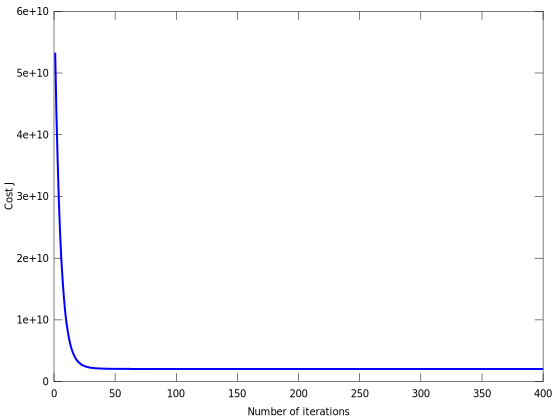

In [55]:
% Plot the convergence graph
# figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');
fprintf('Final J = %f \n', J_history(400));

% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
% Recall that the first column of X is all-ones. Thus, it does
% not need to be normalized.
price = theta(1) + theta(2)*(1650-mu(1))/sigma(1) + theta(3)*(3-mu(2))/sigma(2); % You should change this


% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);

# fprintf('Program paused. Press enter to continue.\n');
# pause;

In [61]:
%% ================ Part 3: Normal Equations ================

fprintf('Solving with normal equations...\n');

% ====================== YOUR CODE HERE ======================
% Instructions: The following code computes the closed form 
%               solution for linear regression using the normal
%               equations. You should complete the code in 
%               normalEqn.m
%
%               After doing so, you should complete this code 
%               to predict the price of a 1650 sq-ft, 3 br house.
%

%% Load Data
data = csvread('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');

# Calculate Cost with parameters calculated using the normal equation
cost = computeCostMulti(X, y, theta);
fprintf('Cost computed from the normal equations: \n');
fprintf(' %f \n', cost);
fprintf('\n');


# Estimate the price of a 1650 sq-ft, 3 br house
H = [1; 1650; 3];
price = theta' * H;


% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);

Solving with normal equations...
Theta computed from the normal equations: 
 89597.909542 
 139.210674 
 -8738.019112 

Cost computed from the normal equations: 
 2043280050.602828 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335


$\theta$ is different when solving using the normal equations as the features are not normalized.  
The predicted price is the same.